In [2]:
# import packages

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [3]:
# Import dataset
data = pd.read_csv("data/kc_house_data.csv")
data

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,...,sewer_system,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,address,lat,long
0,7399300360,5/24/2022,675000.0,4,1.0,1180,7140,1.0,NO,NO,...,PUBLIC,1180,0,0,40,1969,0,"2102 Southeast 21st Court, Renton, Washington ...",47.461975,-122.19052
1,8910500230,12/13/2021,920000.0,5,2.5,2770,6703,1.0,NO,NO,...,PUBLIC,1570,1570,0,240,1950,0,"11231 Greenwood Avenue North, Seattle, Washing...",47.711525,-122.35591
2,1180000275,9/29/2021,311000.0,6,2.0,2880,6156,1.0,NO,NO,...,PUBLIC,1580,1580,0,0,1956,0,"8504 South 113th Street, Seattle, Washington 9...",47.502045,-122.22520
3,1604601802,12/14/2021,775000.0,3,3.0,2160,1400,2.0,NO,NO,...,PUBLIC,1090,1070,200,270,2010,0,"4079 Letitia Avenue South, Seattle, Washington...",47.566110,-122.29020
4,8562780790,8/24/2021,592500.0,2,2.0,1120,758,2.0,NO,NO,...,PUBLIC,1120,550,550,30,2012,0,"2193 Northwest Talus Drive, Issaquah, Washingt...",47.532470,-122.07188
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30150,7834800180,11/30/2021,1555000.0,5,2.0,1910,4000,1.5,NO,NO,...,PUBLIC,1600,1130,0,210,1921,0,"4673 Eastern Avenue North, Seattle, Washington...",47.664740,-122.32940
30151,194000695,6/16/2021,1313000.0,3,2.0,2020,5800,2.0,NO,NO,...,PUBLIC,2020,0,0,520,2011,0,"4131 44th Avenue Southwest, Seattle, Washingto...",47.565610,-122.38851
30152,7960100080,5/27/2022,800000.0,3,2.0,1620,3600,1.0,NO,NO,...,PUBLIC,940,920,240,110,1995,0,"910 Martin Luther King Jr Way, Seattle, Washin...",47.610395,-122.29585
30153,2781280080,2/24/2022,775000.0,3,2.5,2570,2889,2.0,NO,NO,...,PUBLIC,1830,740,480,100,2006,0,"17127 114th Avenue Southeast, Renton, Washingt...",47.449490,-122.18908


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30155 entries, 0 to 30154
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             30155 non-null  int64  
 1   date           30155 non-null  object 
 2   price          30155 non-null  float64
 3   bedrooms       30155 non-null  int64  
 4   bathrooms      30155 non-null  float64
 5   sqft_living    30155 non-null  int64  
 6   sqft_lot       30155 non-null  int64  
 7   floors         30155 non-null  float64
 8   waterfront     30155 non-null  object 
 9   greenbelt      30155 non-null  object 
 10  nuisance       30155 non-null  object 
 11  view           30155 non-null  object 
 12  condition      30155 non-null  object 
 13  grade          30155 non-null  object 
 14  heat_source    30123 non-null  object 
 15  sewer_system   30141 non-null  object 
 16  sqft_above     30155 non-null  int64  
 17  sqft_basement  30155 non-null  int64  
 18  sqft_g

In [5]:
data.corr()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,lat,long
id,1.000000,-0.034184,-0.006306,-0.012094,-0.027932,-0.119101,0.032043,-0.023216,-0.014662,-0.007829,-0.041625,0.023071,-0.029131,-0.000691,0.000479
price,-0.034184,1.000000,0.289204,0.480401,0.608521,0.085730,0.180576,0.538651,0.245058,0.264169,0.313409,0.096013,0.084786,0.063632,-0.022509
bedrooms,-0.006306,0.289204,1.000000,0.589273,0.637874,0.003306,0.147592,0.547164,0.238502,0.319441,0.183439,0.146191,0.014286,0.108758,-0.106689
bathrooms,-0.012094,0.480401,0.589273,1.000000,0.772677,0.035886,0.404412,0.674924,0.260902,0.457022,0.327551,0.443648,0.040631,-0.005225,0.017400
sqft_living,-0.027932,0.608521,0.637874,0.772677,1.000000,0.119563,0.304240,0.883984,0.338460,0.511740,0.396030,0.291694,0.038499,0.102186,-0.087669
sqft_lot,-0.119101,0.085730,0.003306,0.035886,0.119563,1.000000,-0.032097,0.129231,0.004111,0.087169,0.155250,0.001750,0.010049,0.030020,-0.034308
floors,0.032043,0.180576,0.147592,0.404412,0.304240,-0.032097,1.000000,0.448281,-0.248093,0.132656,0.125183,0.544646,-0.025449,-0.218554,0.233781
sqft_above,-0.023216,0.538651,0.547164,0.674924,0.883984,0.129231,0.448281,1.000000,-0.066801,0.560551,0.312117,0.387448,0.010598,0.092258,-0.082744
sqft_basement,-0.014662,0.245058,0.238502,0.260902,0.338460,0.004111,-0.248093,-0.066801,1.000000,0.026361,0.210500,-0.230226,0.053634,0.059788,-0.045208
sqft_garage,-0.007829,0.264169,0.319441,0.457022,0.511740,0.087169,0.132656,0.560551,0.026361,1.000000,0.216354,0.447560,-0.098603,0.092346,-0.096861


# Initial Look at Data to Get Information

In [6]:
data['sqft_above'].value_counts()

1200    282
1300    282
1060    271
1100    268
1250    265
       ... 
1799      1
1783      1
1767      1
7700      1
2049      1
Name: sqft_above, Length: 1187, dtype: int64

In [7]:
data['heat_source'].value_counts()

Gas                  20583
Electricity           6465
Oil                   2899
Gas/Solar               93
Electricity/Solar       59
Other                   20
Oil/Solar                4
Name: heat_source, dtype: int64

In [8]:
data['sewer_system'].value_counts()

PUBLIC                25777
PRIVATE                4355
PRIVATE RESTRICTED        6
PUBLIC RESTRICTED         3
Name: sewer_system, dtype: int64

In [9]:
data['sewer_system'].isnull()

0        False
1        False
2        False
3        False
4        False
         ...  
30150    False
30151    False
30152    False
30153    False
30154    False
Name: sewer_system, Length: 30155, dtype: bool

# One duplicate in ID, a few nulls in 'Sewer_system' and 'heat_source', could drop these since there are only a few

### Dropping the duplicated ID

In [10]:
data[data.duplicated(subset=['id'])]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,...,sewer_system,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,address,lat,long
4846,1233100736,9/28/2021,2600000.0,3,4.0,3500,8455,2.0,NO,NO,...,PUBLIC,2590,1410,500,290,2019,0,"12611 Northeast 87th Place, Kirkland, Washingt...",47.68069,-122.172135


In [11]:
data[data['id'].isin(['1233100736'])]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,...,sewer_system,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,address,lat,long
4845,1233100736,9/28/2021,2600000.0,3,4.0,3500,8455,2.0,NO,NO,...,PUBLIC,2590,1410,500,290,2019,0,"12611 Northeast 87th Place, Kirkland, Washingt...",47.68069,-122.172135
4846,1233100736,9/28/2021,2600000.0,3,4.0,3500,8455,2.0,NO,NO,...,PUBLIC,2590,1410,500,290,2019,0,"12611 Northeast 87th Place, Kirkland, Washingt...",47.68069,-122.172135


In [12]:
data_clean = data.drop_duplicates(subset = ['id'])
data_clean

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,...,sewer_system,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,address,lat,long
0,7399300360,5/24/2022,675000.0,4,1.0,1180,7140,1.0,NO,NO,...,PUBLIC,1180,0,0,40,1969,0,"2102 Southeast 21st Court, Renton, Washington ...",47.461975,-122.19052
1,8910500230,12/13/2021,920000.0,5,2.5,2770,6703,1.0,NO,NO,...,PUBLIC,1570,1570,0,240,1950,0,"11231 Greenwood Avenue North, Seattle, Washing...",47.711525,-122.35591
2,1180000275,9/29/2021,311000.0,6,2.0,2880,6156,1.0,NO,NO,...,PUBLIC,1580,1580,0,0,1956,0,"8504 South 113th Street, Seattle, Washington 9...",47.502045,-122.22520
3,1604601802,12/14/2021,775000.0,3,3.0,2160,1400,2.0,NO,NO,...,PUBLIC,1090,1070,200,270,2010,0,"4079 Letitia Avenue South, Seattle, Washington...",47.566110,-122.29020
4,8562780790,8/24/2021,592500.0,2,2.0,1120,758,2.0,NO,NO,...,PUBLIC,1120,550,550,30,2012,0,"2193 Northwest Talus Drive, Issaquah, Washingt...",47.532470,-122.07188
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30150,7834800180,11/30/2021,1555000.0,5,2.0,1910,4000,1.5,NO,NO,...,PUBLIC,1600,1130,0,210,1921,0,"4673 Eastern Avenue North, Seattle, Washington...",47.664740,-122.32940
30151,194000695,6/16/2021,1313000.0,3,2.0,2020,5800,2.0,NO,NO,...,PUBLIC,2020,0,0,520,2011,0,"4131 44th Avenue Southwest, Seattle, Washingto...",47.565610,-122.38851
30152,7960100080,5/27/2022,800000.0,3,2.0,1620,3600,1.0,NO,NO,...,PUBLIC,940,920,240,110,1995,0,"910 Martin Luther King Jr Way, Seattle, Washin...",47.610395,-122.29585
30153,2781280080,2/24/2022,775000.0,3,2.5,2570,2889,2.0,NO,NO,...,PUBLIC,1830,740,480,100,2006,0,"17127 114th Avenue Southeast, Renton, Washingt...",47.449490,-122.18908


### Removing the nulls from 'sewer_System' and 'heat_source'

In [13]:
data_clean = data_clean.dropna(subset=['sewer_system', 'heat_source'])
data_clean

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,...,sewer_system,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,address,lat,long
0,7399300360,5/24/2022,675000.0,4,1.0,1180,7140,1.0,NO,NO,...,PUBLIC,1180,0,0,40,1969,0,"2102 Southeast 21st Court, Renton, Washington ...",47.461975,-122.19052
1,8910500230,12/13/2021,920000.0,5,2.5,2770,6703,1.0,NO,NO,...,PUBLIC,1570,1570,0,240,1950,0,"11231 Greenwood Avenue North, Seattle, Washing...",47.711525,-122.35591
2,1180000275,9/29/2021,311000.0,6,2.0,2880,6156,1.0,NO,NO,...,PUBLIC,1580,1580,0,0,1956,0,"8504 South 113th Street, Seattle, Washington 9...",47.502045,-122.22520
3,1604601802,12/14/2021,775000.0,3,3.0,2160,1400,2.0,NO,NO,...,PUBLIC,1090,1070,200,270,2010,0,"4079 Letitia Avenue South, Seattle, Washington...",47.566110,-122.29020
4,8562780790,8/24/2021,592500.0,2,2.0,1120,758,2.0,NO,NO,...,PUBLIC,1120,550,550,30,2012,0,"2193 Northwest Talus Drive, Issaquah, Washingt...",47.532470,-122.07188
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30150,7834800180,11/30/2021,1555000.0,5,2.0,1910,4000,1.5,NO,NO,...,PUBLIC,1600,1130,0,210,1921,0,"4673 Eastern Avenue North, Seattle, Washington...",47.664740,-122.32940
30151,194000695,6/16/2021,1313000.0,3,2.0,2020,5800,2.0,NO,NO,...,PUBLIC,2020,0,0,520,2011,0,"4131 44th Avenue Southwest, Seattle, Washingto...",47.565610,-122.38851
30152,7960100080,5/27/2022,800000.0,3,2.0,1620,3600,1.0,NO,NO,...,PUBLIC,940,920,240,110,1995,0,"910 Martin Luther King Jr Way, Seattle, Washin...",47.610395,-122.29585
30153,2781280080,2/24/2022,775000.0,3,2.5,2570,2889,2.0,NO,NO,...,PUBLIC,1830,740,480,100,2006,0,"17127 114th Avenue Southeast, Renton, Washingt...",47.449490,-122.18908


In [14]:
data_clean['waterfront'].value_counts()

NO     29599
YES      511
Name: waterfront, dtype: int64

# Separating Out Zipcode from the Address

In [15]:
data_clean['address']

0        2102 Southeast 21st Court, Renton, Washington ...
1        11231 Greenwood Avenue North, Seattle, Washing...
2        8504 South 113th Street, Seattle, Washington 9...
3        4079 Letitia Avenue South, Seattle, Washington...
4        2193 Northwest Talus Drive, Issaquah, Washingt...
                               ...                        
30150    4673 Eastern Avenue North, Seattle, Washington...
30151    4131 44th Avenue Southwest, Seattle, Washingto...
30152    910 Martin Luther King Jr Way, Seattle, Washin...
30153    17127 114th Avenue Southeast, Renton, Washingt...
30154    18615 7th Avenue South, Burien, Washington 981...
Name: address, Length: 30110, dtype: object

In [16]:
# This creates a new column with our zipcodes of the houses
data_clean['postal_code'] = data_clean['address'].str[-20:-15]
data_clean

<ipython-input-16-ad923d199017>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clean['postal_code'] = data_clean['address'].str[-20:-15]


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,...,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,address,lat,long,postal_code
0,7399300360,5/24/2022,675000.0,4,1.0,1180,7140,1.0,NO,NO,...,1180,0,0,40,1969,0,"2102 Southeast 21st Court, Renton, Washington ...",47.461975,-122.19052,98055
1,8910500230,12/13/2021,920000.0,5,2.5,2770,6703,1.0,NO,NO,...,1570,1570,0,240,1950,0,"11231 Greenwood Avenue North, Seattle, Washing...",47.711525,-122.35591,98133
2,1180000275,9/29/2021,311000.0,6,2.0,2880,6156,1.0,NO,NO,...,1580,1580,0,0,1956,0,"8504 South 113th Street, Seattle, Washington 9...",47.502045,-122.22520,98178
3,1604601802,12/14/2021,775000.0,3,3.0,2160,1400,2.0,NO,NO,...,1090,1070,200,270,2010,0,"4079 Letitia Avenue South, Seattle, Washington...",47.566110,-122.29020,98118
4,8562780790,8/24/2021,592500.0,2,2.0,1120,758,2.0,NO,NO,...,1120,550,550,30,2012,0,"2193 Northwest Talus Drive, Issaquah, Washingt...",47.532470,-122.07188,98027
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30150,7834800180,11/30/2021,1555000.0,5,2.0,1910,4000,1.5,NO,NO,...,1600,1130,0,210,1921,0,"4673 Eastern Avenue North, Seattle, Washington...",47.664740,-122.32940,98103
30151,194000695,6/16/2021,1313000.0,3,2.0,2020,5800,2.0,NO,NO,...,2020,0,0,520,2011,0,"4131 44th Avenue Southwest, Seattle, Washingto...",47.565610,-122.38851,98116
30152,7960100080,5/27/2022,800000.0,3,2.0,1620,3600,1.0,NO,NO,...,940,920,240,110,1995,0,"910 Martin Luther King Jr Way, Seattle, Washin...",47.610395,-122.29585,98122
30153,2781280080,2/24/2022,775000.0,3,2.5,2570,2889,2.0,NO,NO,...,1830,740,480,100,2006,0,"17127 114th Avenue Southeast, Renton, Washingt...",47.449490,-122.18908,98055


In [42]:
print(data_clean['price'].sort_values(ascending = False))

23470    30750000.0
3760     23500000.0
25561    22750000.0
27175    20000000.0
18100    17800000.0
            ...    
27028       28854.0
20406       28559.0
7577        28307.0
21793       27563.0
8557        27360.0
Name: price, Length: 30110, dtype: float64


In [46]:
data_clean['price'].quantile(0.34)

720000.0

### Export this cleaned dataset as a .csv, this will be our "master dataset"

In [17]:
data_clean.to_csv('data_cleaned.csv')

In [18]:
data_clean['price'].describe()

count    3.011000e+04
mean     1.108921e+06
std      8.964895e+05
min      2.736000e+04
25%      6.491180e+05
50%      8.600000e+05
75%      1.300000e+06
max      3.075000e+07
Name: price, dtype: float64

In [19]:
data_clean['postal_code'].value_counts()

98042    992
98038    857
98103    761
98115    760
98117    748
        ... 
46554      1
17922      1
02341      1
02645      1
55063      1
Name: postal_code, Length: 399, dtype: int64

### Checking correlations with Price

In [20]:
data_clean.corr()['price'].map(abs).sort_values(ascending=False)

price            1.000000
sqft_living      0.608586
sqft_above       0.538614
bathrooms        0.480284
sqft_patio       0.313787
bedrooms         0.288992
sqft_garage      0.263655
sqft_basement    0.244938
floors           0.180555
yr_built         0.095728
sqft_lot         0.086562
yr_renovated     0.085039
lat              0.063419
id               0.034035
long             0.022271
Name: price, dtype: float64

In [21]:
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30110 entries, 0 to 30154
Data columns (total 26 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             30110 non-null  int64  
 1   date           30110 non-null  object 
 2   price          30110 non-null  float64
 3   bedrooms       30110 non-null  int64  
 4   bathrooms      30110 non-null  float64
 5   sqft_living    30110 non-null  int64  
 6   sqft_lot       30110 non-null  int64  
 7   floors         30110 non-null  float64
 8   waterfront     30110 non-null  object 
 9   greenbelt      30110 non-null  object 
 10  nuisance       30110 non-null  object 
 11  view           30110 non-null  object 
 12  condition      30110 non-null  object 
 13  grade          30110 non-null  object 
 14  heat_source    30110 non-null  object 
 15  sewer_system   30110 non-null  object 
 16  sqft_above     30110 non-null  int64  
 17  sqft_basement  30110 non-null  int64  
 18  sqft_g

### Let's look at the two highest correlation values against price: sqft_living sqft_above

In [22]:
price_preds = data_clean[['sqft_living', 'sqft_above']]
y = data_clean['price']
preds_with_const = sm.add_constant(price_preds)

In [23]:
sqftmodel = sm.OLS(endog=y, exog=preds_with_const).fit()

In [24]:
sqftmodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.370
Model:                            OLS   Adj. R-squared:                  0.370
Method:                 Least Squares   F-statistic:                     8855.
Date:                Mon, 13 Feb 2023   Prob (F-statistic):               0.00
Time:                        12:35:20   Log-Likelihood:            -4.4845e+05
No. Observations:               30110   AIC:                         8.969e+05
Df Residuals:                   30107   BIC:                         8.969e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const         -7.6e+04   9879.943     -7.692      0.000   -9.54e+04   -5.66e+04
sqft_living   557.5539      8.999     61.956      0.000     539.915     575.193
sqft_above      3.6706      9.980      0.368      0.713     -15.892      23.233
==============================================================================
Omnibus:                    43384.180   Durbin-Watson:                   1.862
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         47179770.178
Skew:                           8.195   Prob(JB):                         0.00
Kurtosis:                     196.229   Cond. No.                     7.37e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.37e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

- sqft_above has a p value of 0.713, yikes! Let's get rid of that value and try adding the next best coefficient to price: bathrooms.

### Sqft_living + bathrooms

In [25]:
price_preds2 = data_clean[['sqft_living', 'bathrooms']]
y = data_clean['price']
preds_with_const2 = sm.add_constant(price_preds2)

In [26]:
sqftmodel2 = sm.OLS(endog=y, exog=preds_with_const2).fit()

In [27]:
sqftmodel2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.371
Model:                            OLS   Adj. R-squared:                  0.371
Method:                 Least Squares   F-statistic:                     8865.
Date:                Mon, 13 Feb 2023   Prob (F-statistic):               0.00
Time:                        12:35:20   Log-Likelihood:            -4.4845e+05
No. Observations:               30110   AIC:                         8.969e+05
Df Residuals:                   30107   BIC:                         8.969e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        -9.74e+04   1.16e+04     -8.421      0.000    -1.2e+05   -7.47e+04
sqft_living   542.2833      6.627     81.827      0.000     529.294     555.273
bathrooms    2.582e+04   7262.677      3.556      0.000    1.16e+04    4.01e+04
==============================================================================
Omnibus:                    43385.641   Durbin-Watson:                   1.862
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         47035528.324
Skew:                           8.197   Prob(JB):                         0.00
Kurtosis:                     195.931   Cond. No.                     7.03e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.03e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Let's try building a model, this was for bathrooms and floors

In [31]:
# Select only the float datatypes
X_bathfloors = data_clean.select_dtypes(include=float)

In [32]:
X_dropprice = X_bathfloors.drop(columns=['price','lat','long'])

In [33]:
y = data_clean['price']

### Build Model

In [34]:
sm.OLS(endog = y, exog = X_dropprice).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.696
Model:                            OLS   Adj. R-squared (uncentered):              0.696
Method:                 Least Squares   F-statistic:                          3.447e+04
Date:                Mon, 13 Feb 2023   Prob (F-statistic):                        0.00
Time:                        12:39:07   Log-Likelihood:                     -4.5147e+05
No. Observations:               30110   AIC:                                  9.029e+05
Df Residuals:                   30108   BIC:                                  9.030e+05
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
bathrooms   4.915e+05   4829.152    101.785      0.000    4.82e+05    5.01e+05
floors     -2.541e+04   7337.499     -3.463      0.001   -3.98e+04    -1.1e+04
==============================================================================
Omnibus:                    40032.851   Durbin-Watson:                   1.891
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         24491290.429
Skew:                           7.157   Prob(JB):                         0.00
Kurtosis:                     141.984   Cond. No.                         5.62
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Take a look at the distribution of prices

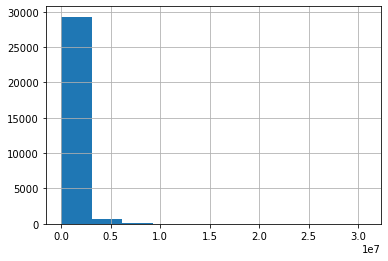

In [35]:
y.hist();

### If we transform with log what does this look like?

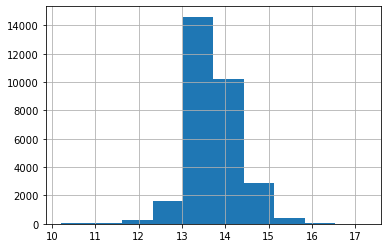

In [36]:
y_scld = np.log(y)
y_scld.hist();

- Looks more normally distributed

### Let's try scaling the price axis with a logarithmic transformation

In [39]:
model_price2 = sm.OLS(y_scld, preds_with_const2).fit()
model_price2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.390
Model:                            OLS   Adj. R-squared:                  0.390
Method:                 Least Squares   F-statistic:                     9628.
Date:                Mon, 13 Feb 2023   Prob (F-statistic):               0.00
Time:                        12:40:11   Log-Likelihood:                -18982.
No. Observations:               30110   AIC:                         3.797e+04
Df Residuals:                   30107   BIC:                         3.800e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          12.8998      0.007   1745.085      0.000      12.885      12.914
sqft_living     0.0003   4.24e-06     78.014      0.000       0.000       0.000
bathrooms       0.0588      0.005     12.672      0.000       0.050       0.068
==============================================================================
Omnibus:                     5755.384   Durbin-Watson:                   1.972
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            49708.357
Skew:                          -0.677   Prob(JB):                         0.00
Kurtosis:                       9.147   Cond. No.                     7.03e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.03e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Build model with log-scaled target

In [ ]:
model_price = sm.OLS(y_scld, X_dropprice).fit()
model_price.summary()

### One-Hot Encoding Categorical Columns

In [40]:
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30110 entries, 0 to 30154
Data columns (total 26 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             30110 non-null  int64  
 1   date           30110 non-null  object 
 2   price          30110 non-null  float64
 3   bedrooms       30110 non-null  int64  
 4   bathrooms      30110 non-null  float64
 5   sqft_living    30110 non-null  int64  
 6   sqft_lot       30110 non-null  int64  
 7   floors         30110 non-null  float64
 8   waterfront     30110 non-null  object 
 9   greenbelt      30110 non-null  object 
 10  nuisance       30110 non-null  object 
 11  view           30110 non-null  object 
 12  condition      30110 non-null  object 
 13  grade          30110 non-null  object 
 14  heat_source    30110 non-null  object 
 15  sewer_system   30110 non-null  object 
 16  sqft_above     30110 non-null  int64  
 17  sqft_basement  30110 non-null  int64  
 18  sqft_g

### Build Dummy Regressor